In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import seaborn as sb

In [42]:
df = pd.read_csv('../input/dapprojekt22/train.csv')
df

,AST_AWAY,AST_HOME,AST_PCT_AWAY,AST_PCT_HOME,AST_RATIO_AWAY,AST_RATIO_HOME,AST_TOV_AWAY,AST_TOV_HOME,BLKA_AWAY,BLKA_HOME,...,UFGM_AWAY,UFGM_HOME,UFG_PCT_AWAY,UFG_PCT_HOME,USG_PCT_AWAY,USG_PCT_HOME,NEXT_HOME,NEXT_AWAY,NEXT_WINNER,NEXT_WEIGHT
0,17,17,0.472,0.500,12.7,13.8,0.89,0.81,18,6,...,19,14,0.452,0.424,0.197,0.198,MIA,CHI,0.0,1.489674
1,23,26,0.657,0.703,17.0,19.9,1.21,1.30,7,4,...,18,26,0.375,0.591,0.198,0.196,LAL,LAC,0.0,5.361710
2,27,23,0.659,0.548,19.8,15.6,1.69,1.21,6,4,...,18,27,0.462,0.435,0.200,0.200,CLE,BKN,0.0,2.357026
3,24,21,0.727,0.600,18.2,15.7,1.60,1.50,3,8,...,20,21,0.426,0.525,0.200,0.195,PHI,MIA,0.0,5.980445
4,30,24,0.714,0.558,21.5,18.1,1.58,1.33,1,0,...,32,26,0.485,0.520,0.200,0.200,TOR,BOS,0.0,1.283159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3685,31,41,0.775,0.732,20.9,27.3,1.94,3.15,8,0,...,23,27,0.404,0.574,0.200,0.200,GSW,MEM,0.0,1.047307
3686,25,35,0.595,0.761,17.5,24.0,1.92,2.06,7,1,...,22,35,0.386,0.547,0.200,0.200,LAL,UTA,0.0,2.565129
3687,27,19,0.692,0.463,20.7,15.2,1.93,1.36,3,1,...,23,15,0.442,0.455,0.198,0.198,PHX,LAC,0.0,1.540541
3688,23,26,0.535,0.578,16.5,17.1,1.53,1.53,5,6,...,28,19,0.459,0.388,0.200,0.198,POR,DEN,0.0,1.233932


In [43]:
df.columns.tolist()

['AST_AWAY',
 'AST_HOME',
 'AST_PCT_AWAY',
 'AST_PCT_HOME',
 'AST_RATIO_AWAY',
 'AST_RATIO_HOME',
 'AST_TOV_AWAY',
 'AST_TOV_HOME',
 'BLKA_AWAY',
 'BLKA_HOME',
 'BLK_AWAY',
 'BLK_HOME',
 'BOX_OUTS_AWAY',
 'BOX_OUTS_HOME',
 'CFGA_AWAY',
 'CFGA_HOME',
 'CFGM_AWAY',
 'CFGM_HOME',
 'CFG_PCT_AWAY',
 'CFG_PCT_HOME',
 'CHARGES_DRAWN_AWAY',
 'CHARGES_DRAWN_HOME',
 'CONTESTED_SHOTS_2PT_AWAY',
 'CONTESTED_SHOTS_2PT_HOME',
 'CONTESTED_SHOTS_3PT_AWAY',
 'CONTESTED_SHOTS_3PT_HOME',
 'CONTESTED_SHOTS_AWAY',
 'CONTESTED_SHOTS_HOME',
 'DEFLECTIONS_AWAY',
 'DEFLECTIONS_HOME',
 'DEF_RATING_AWAY',
 'DEF_RATING_HOME',
 'DFGA_AWAY',
 'DFGA_HOME',
 'DFGM_AWAY',
 'DFGM_HOME',
 'DFG_PCT_AWAY',
 'DFG_PCT_HOME',
 'DIST_AWAY',
 'DIST_HOME',
 'DRBC_AWAY',
 'DRBC_HOME',
 'DREB_AWAY',
 'DREB_HOME',
 'DREB_PCT_AWAY',
 'DREB_PCT_HOME',
 'EFG_PCT_AWAY',
 'EFG_PCT_HOME',
 'FG3A_AWAY',
 'FG3A_HOME',
 'FG3M_AWAY',
 'FG3M_HOME',
 'FG3_PCT_AWAY',
 'FG3_PCT_HOME',
 'FGA_AWAY',
 'FGA_HOME',
 'FGM_AWAY',
 'FGM_HOME',
 'FG_PCT

# **1. Dimensionality of the dataset**

The dimensionality of the dataset is the number of features a dataset has (usually the number of columns), which is **230**. This changes throughout the notebook as some features get removed.

In [44]:
df.shape

(3690, 230)

# **2. Features distributions**
**How many different types of distributions are there? Do some distributions suggest the feature is useless? If yes, explain why is that the case.**


The main types of distributions are discrete and continuous distributions.
There are a lot of different subtypes of theoretical distributions. Some well known distributions are:    
 1. Bernoulli distribution (discrete) - takes the value of 1 with probability $p$ and value of 0 with probability $1-p$
 2. Categorical distribution (discrete) - takes the values of $x \in \{0, \dots, K\}$ with probabilities $p_0, \dots, p_k$
 3. Normal distribution (continous) - defined by the mean $\mu$ and variance $\sigma^2$
 4. Uniform distribution (continous) -  defined by the lower bound $a$ and upper bound $b$

Most distributions in this dataset are normal distributions (eg. FGM_AWAY, FGM_HOME, PCT_PTS_3PT_AWAY, PCT_PTS_3PT_HOME, AST_AWAY, AST_HOME etc.). I managed to find categorical distributions (eg. NEXT_HOME) and Bernoulli distributions (eg. NEXT_WINNER). Also, some distributions have interesting properties like skew (eg. BLK_HOME, BLK_HOME, NEXT_WEIGHT), or bimodality (eg. PLUS_MINUS_AWAY, PLUS_MINUS_HOME)

Judging from the distributions of the features I plotted, some features might be useless. Eg. PACE_HOME or PACE_AWAY might be redundant because the values of those 2 are the same so one of them can be removed. It could also beneficial to remove sparse features (the height of the zero column in the histogram would be much higher than the others, but I didn't find any), constant features (there would only be one column in the histogram eg. PCT_AST_AWAY, PCT_AST_HOME) and features with missing values (the sum of the column heights would be less than the number of examples in the dataset eg. BOX_OUT_AWAY, BOX_OUTS_HOME).

For most of the features I grouped the feature X_AWAY and X_HOME together because I thought it would be interesting to see does playing games HOME vs AWAY have any impact on the distribution.

In [45]:
def draw_hist(feat_away, feat_home, bins=35):
    plt.title(f'{feat_away} and {feat_home} histogram')
    plt.hist(df[feat_away], bins=bins, alpha=0.6, label=feat_away)
    plt.hist(df[feat_home], color='r', bins=bins, alpha=0.35, label=feat_home)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

def draw_hist_separate(feat_away, feat_home, bins=35, figsize=(7, 10)):
    fig, axs = plt.subplots(2, 1, figsize=figsize)
    axs[0].set_title(f'{feat_away} histogram')
    axs[0].hist(df[feat_away], bins=bins, alpha=0.6, label=feat_away)
    axs[0].set_xlabel('Value')
    axs[0].set_ylabel('Frequency')
    
    axs[1].set_title(f'{feat_home} histogram')
    axs[1].hist(df[feat_home], color='r', bins=bins, alpha=0.35, label=feat_home)
    axs[1].set_xlabel('Value')
    axs[1].set_ylabel('Frequency')
    plt.show()
    
def draw_one_hist(feat, bins=35, figsize=(10, 5), rotate=False, width=1):
    plt.figure(figsize=figsize)
    plt.title(f'{feat} histogram')
    plt.hist(df[feat], bins=bins, alpha=0.5, rwidth=width)
    if rotate:
        plt.xticks(rotation=45)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

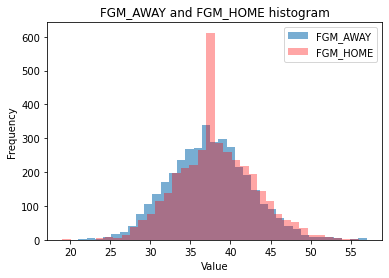

In [46]:
# examples of normal distributions, very common in the dataset

draw_hist('FGM_AWAY', 'FGM_HOME')

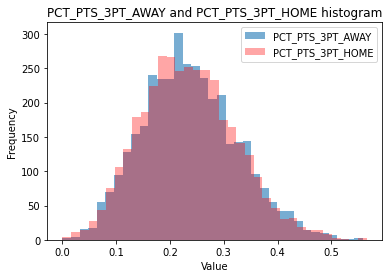

In [47]:
draw_hist('PCT_PTS_3PT_AWAY', 'PCT_PTS_3PT_HOME')

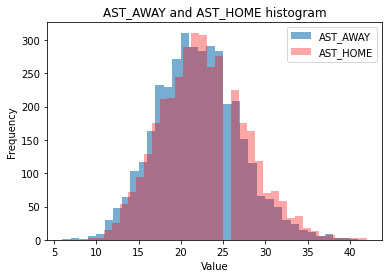

In [48]:
draw_hist('AST_AWAY', 'AST_HOME')

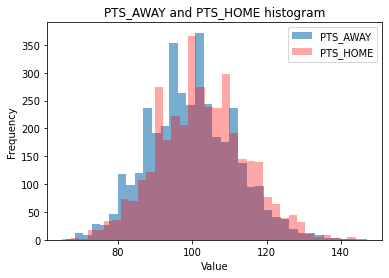

In [49]:
draw_hist('PTS_AWAY', 'PTS_HOME')

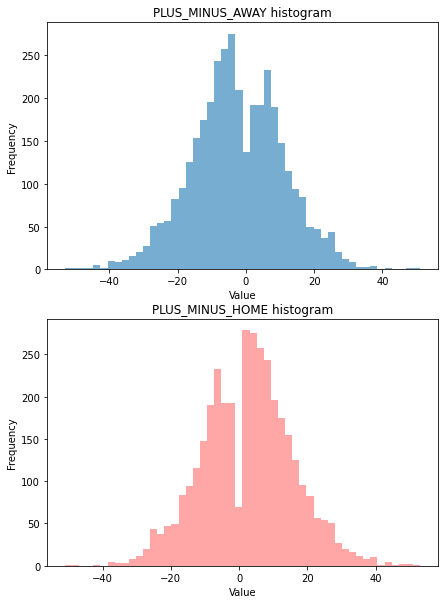

In [50]:
# an example of two bimodal distributions
draw_hist_separate('PLUS_MINUS_AWAY', 'PLUS_MINUS_HOME', bins=50)

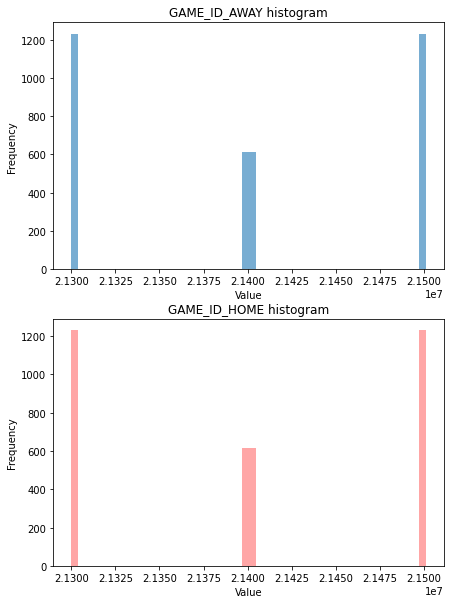

length of unique values in GAME_ID_AWAY and all the values in GAME_ID_AWAY is same:  True
length of unique values in GAME_ID_HOME and all the values in GAME_ID_HOME is same:  True
                      all the values in GAME_ID_AWAY and GAME_ID_HOME are the same:  True


In [51]:
draw_hist_separate('GAME_ID_AWAY', 'GAME_ID_HOME', bins=50)
print('length of unique values in GAME_ID_AWAY and all the values in GAME_ID_AWAY is same: ',len(df['GAME_ID_AWAY'].unique().tolist()) == len(df['GAME_ID_AWAY'].values.tolist())) 
print('length of unique values in GAME_ID_HOME and all the values in GAME_ID_HOME is same: ',len(df['GAME_ID_HOME'].unique().tolist()) == len(df['GAME_ID_HOME'].values.tolist())) 
print('                      all the values in GAME_ID_AWAY and GAME_ID_HOME are the same: ', (df['GAME_ID_AWAY'] == df['GAME_ID_HOME']).values.all())

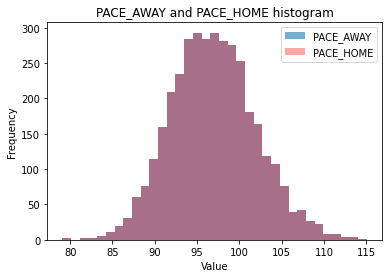

all the values in PACE_AWAY and PACE_HOME are the same:  True


In [52]:
# normal distributions, but completely the same

draw_hist('PACE_AWAY', 'PACE_HOME')
print('all the values in PACE_AWAY and PACE_HOME are the same: ',(df['PACE_AWAY'] == df['PACE_HOME']).values.all())

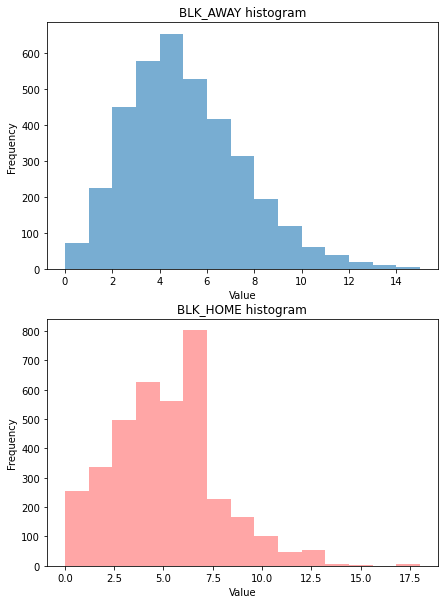

In [53]:
# examples of a skewed distribution
draw_hist_separate('BLK_AWAY', 'BLK_HOME', bins=15)

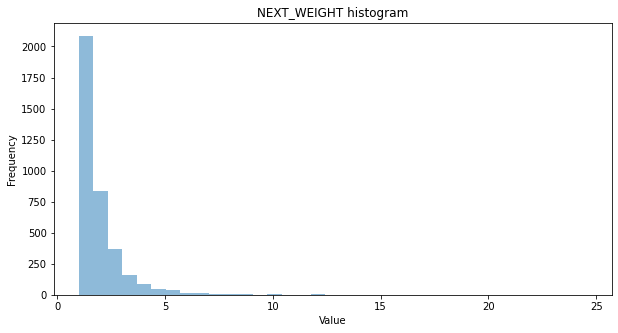

In [54]:
# heavily skewed distribution

draw_one_hist('NEXT_WEIGHT')

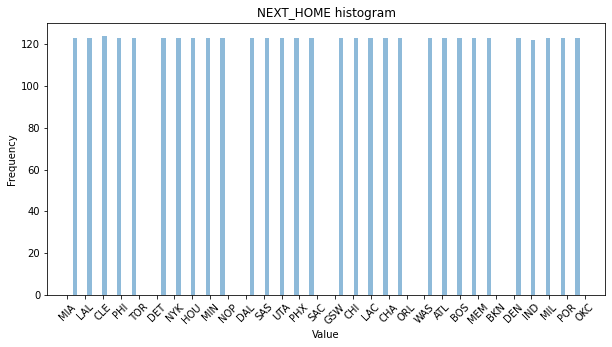

In [55]:
# categorical distribution but not normalized

draw_one_hist('NEXT_HOME', width=0.3, rotate=True)

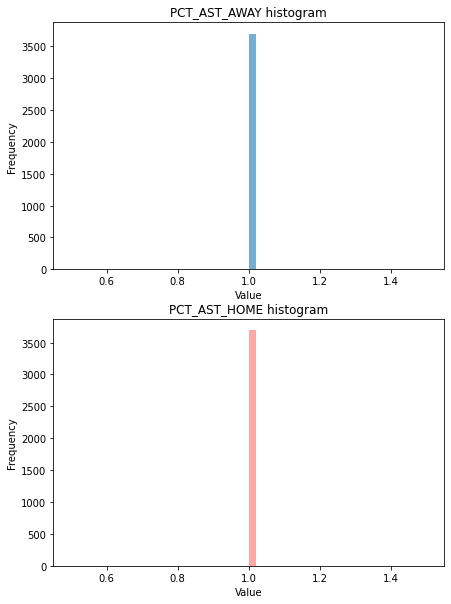

In [56]:
# examples of constant features, will be taken care of in the next section

draw_hist_separate('PCT_AST_AWAY', 'PCT_AST_HOME', bins=50)

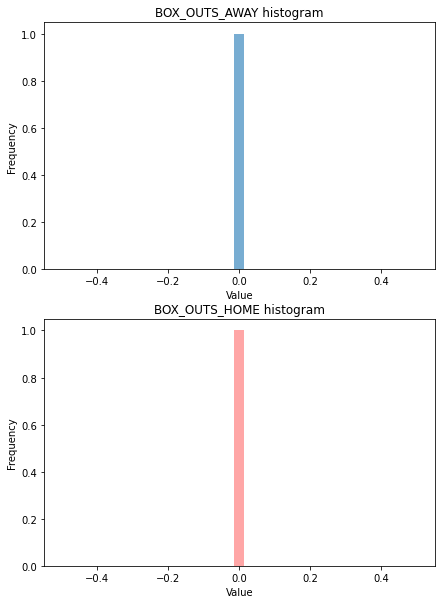

In [57]:
# examples of features with missing values, will be taken of care in the next section

draw_hist_separate('BOX_OUTS_AWAY', 'BOX_OUTS_HOME')

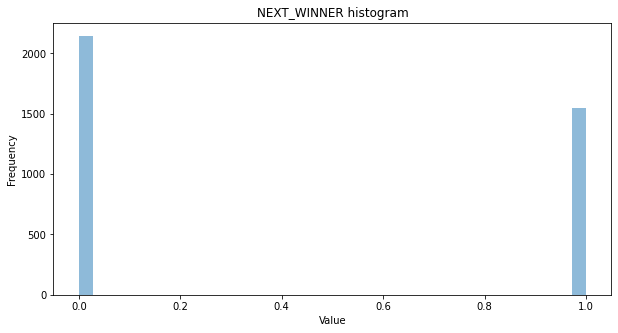

In [58]:
# bernoulli distribution but not normalized

draw_one_hist('NEXT_WINNER')

# **3. Missing values**
**Are there any? If yes, what will you do about it? Why?**

There are a lot of missing values in this dataset, in particular almost all the data is missing for 18 features. Because so much of the data is missing I think the best idea would be to completely remove these features.

In [59]:
df_missing = df.isna().sum()[df.isna().sum() != 0]
df_missing 

BOX_OUTS_AWAY                 3689
BOX_OUTS_HOME                 3689
CHARGES_DRAWN_AWAY            3689
CHARGES_DRAWN_HOME            3689
CONTESTED_SHOTS_2PT_AWAY      3689
CONTESTED_SHOTS_2PT_HOME      3689
CONTESTED_SHOTS_3PT_AWAY      3689
CONTESTED_SHOTS_3PT_HOME      3689
CONTESTED_SHOTS_AWAY          3689
CONTESTED_SHOTS_HOME          3689
DEFLECTIONS_AWAY              3689
DEFLECTIONS_HOME              3689
LOOSE_BALLS_RECOVERED_AWAY    3689
LOOSE_BALLS_RECOVERED_HOME    3689
MINUTES_AWAY                  3689
MINUTES_HOME                  3689
SCREEN_ASSISTS_AWAY           3689
SCREEN_ASSISTS_HOME           3689
dtype: int64

In [60]:
df_missing.index.values

array(['BOX_OUTS_AWAY', 'BOX_OUTS_HOME', 'CHARGES_DRAWN_AWAY',
       'CHARGES_DRAWN_HOME', 'CONTESTED_SHOTS_2PT_AWAY',
       'CONTESTED_SHOTS_2PT_HOME', 'CONTESTED_SHOTS_3PT_AWAY',
       'CONTESTED_SHOTS_3PT_HOME', 'CONTESTED_SHOTS_AWAY',
       'CONTESTED_SHOTS_HOME', 'DEFLECTIONS_AWAY', 'DEFLECTIONS_HOME',
       'LOOSE_BALLS_RECOVERED_AWAY', 'LOOSE_BALLS_RECOVERED_HOME',
       'MINUTES_AWAY', 'MINUTES_HOME', 'SCREEN_ASSISTS_AWAY',
       'SCREEN_ASSISTS_HOME'], dtype=object)

In [61]:
print(f'Columns in train before removing missing values: {len(df.columns.tolist())}')
df.drop(columns=df_missing.index.values, inplace=True)
print(f' Columns in train after removing missing values: {len(df.columns.tolist())}\n')

df_test = pd.read_csv('../input/dapprojekt22/test.csv')
print(f'Columns in test before removing missing values: {len(df_test.columns.tolist())}')
df_test.drop(columns=df_missing.index.values, inplace=True)
print(f' Columns in test after removing missing values: {len(df_test.columns.tolist())}')

Columns in train before removing missing values: 230
 Columns in train after removing missing values: 212

Columns in test before removing missing values: 229
 Columns in test after removing missing values: 211


There are a lot of monotonous features in the dataset and they should also be removed.

In [62]:
tmp = df.nunique()[df.nunique() == 1]
tmp

PCT_AST_AWAY     1
PCT_AST_HOME     1
PCT_BLKA_AWAY    1
PCT_BLKA_HOME    1
PCT_BLK_AWAY     1
PCT_BLK_HOME     1
PCT_DREB_AWAY    1
PCT_DREB_HOME    1
PCT_FG3A_AWAY    1
PCT_FG3A_HOME    1
PCT_FG3M_AWAY    1
PCT_FG3M_HOME    1
PCT_FGA_AWAY     1
PCT_FGA_HOME     1
PCT_FGM_AWAY     1
PCT_FGM_HOME     1
PCT_FTA_AWAY     1
PCT_FTA_HOME     1
PCT_FTM_AWAY     1
PCT_FTM_HOME     1
PCT_OREB_AWAY    1
PCT_OREB_HOME    1
PCT_PFD_AWAY     1
PCT_PFD_HOME     1
PCT_PF_AWAY      1
PCT_PF_HOME      1
PCT_PTS_AWAY     1
PCT_PTS_HOME     1
PCT_REB_AWAY     1
PCT_REB_HOME     1
PCT_STL_AWAY     1
PCT_STL_HOME     1
PCT_TOV_AWAY     1
PCT_TOV_HOME     1
dtype: int64

In [63]:
df.drop(columns=tmp.index.values, inplace=True)
df_test.drop(columns=tmp.index.values, inplace=True)

print(f'Columns in train after removing monotonous features: {len(df.columns.tolist())}\n')
print(f' Columns in test after removing monotonous features: {len(df_test.columns.tolist())}')

Columns in train after removing monotonous features: 178

 Columns in test after removing monotonous features: 177


# **4. Outliers**
**Do any features contain outliers? If yes, what will you do about it? Why?**

Some features might contain outliers. I'll find them using some outlier detection algorithm and remove them because they might hinder the perfomance of my model. It's also important not to remove too much data so I will take that into account when determining the hyperparameters of the algorithm. Before removing outliers I'll encode the categorical features using a label encoder. MIN_AWAY and MIN_HOME features aren't actually categorical even though they're strings because of the ordinal nature so I'll transform them into integers.

In [64]:
df_categorical = df.select_dtypes(include=['object'])
df_categorical.head()

,MIN_AWAY,MIN_HOME,TEAM_ABBREVIATION_AWAY,TEAM_ABBREVIATION_HOME,TEAM_CITY_AWAY,TEAM_CITY_HOME,TEAM_NAME_AWAY,TEAM_NAME_HOME,NEXT_HOME,NEXT_AWAY
0,240:00,240:00,ORL,IND,Orlando,Indiana,Magic,Pacers,MIA,CHI
1,240:00,240:00,CHI,MIA,Chicago,Miami,Bulls,Heat,LAL,LAC
2,240:00,240:00,LAC,LAL,Los Angeles,Los Angeles,Clippers,Lakers,CLE,BKN
3,240:00,240:00,BKN,CLE,Brooklyn,Cleveland,Nets,Cavaliers,PHI,MIA
4,240:00,240:00,MIA,PHI,Miami,Philadelphia,Heat,76ers,TOR,BOS


In [65]:
df['MIN_HOME'] = np.int32(df['MIN_HOME'].str.split(':').str[0])
df['MIN_AWAY'] = np.int32(df['MIN_AWAY'].str.split(':').str[0])

df_test['MIN_HOME'] = np.int32(df_test['MIN_HOME'].str.split(':').str[0])
df_test['MIN_AWAY'] = np.int32(df_test['MIN_AWAY'].str.split(':').str[0])

display(df[['MIN_HOME', 'MIN_AWAY']])
display(df_test[['MIN_HOME', 'MIN_AWAY']])

,MIN_HOME,MIN_AWAY
0,240,240
1,240,240
2,240,240
3,240,240
4,240,240
...,...,...
3685,240,240
3686,240,240
3687,240,240
3688,240,240


,MIN_HOME,MIN_AWAY
0,240,240
1,240,240
2,240,240
3,240,240
4,265,265
...,...,...
1225,240,240
1226,240,240
1227,240,240
1228,240,240


In [66]:
encoders = []
columns_to_encode = df.select_dtypes(include=['object']).columns.values
for c in columns_to_encode:
    encoder = LabelEncoder()
    df[c] = encoder.fit_transform(df[c])
    df_test[c] = encoder.transform(df_test[c])
    encoders.append(encoder) # in case i'll need the inverse transform

display(df[columns_to_encode].head())
display(df_test[columns_to_encode].head())

,TEAM_ABBREVIATION_AWAY,TEAM_ABBREVIATION_HOME,TEAM_CITY_AWAY,TEAM_CITY_HOME,TEAM_NAME_AWAY,TEAM_NAME_HOME,NEXT_HOME,NEXT_AWAY
0,21,11,21,11,15,19,15,4
1,4,15,4,15,3,9,13,12
2,12,13,13,13,6,14,5,1
3,1,5,2,5,17,4,22,15
4,15,22,15,22,9,0,27,2


,TEAM_ABBREVIATION_AWAY,TEAM_ABBREVIATION_HOME,TEAM_CITY_AWAY,TEAM_CITY_HOME,TEAM_NAME_AWAY,TEAM_NAME_HOME,NEXT_HOME,NEXT_AWAY
0,19,5,19,5,13,4,24,28
1,28,24,28,24,11,28,9,26
2,26,9,26,9,24,29,21,15
3,15,21,15,21,9,15,11,6
4,6,11,6,11,16,19,2,1


In [67]:
y = df['NEXT_WINNER']
X = df.drop(columns=['NEXT_WINNER'])

X_test = df_test[:]

print(f'number of columns in X:  {len(X.columns.values)}, number of columns in X_test: {len(X_test.columns.values)}')

number of columns in X:  177, number of columns in X_test: 177


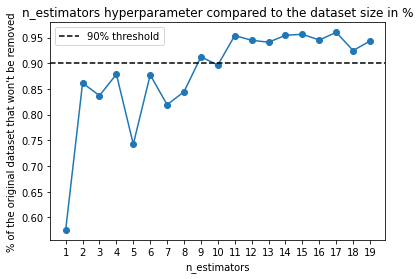

In [68]:
d = {}
for i in range(1, 20):
    lof = IsolationForest(n_estimators=i)
    X_out = lof.fit_predict(X)
    d[i] = np.sum(X_out == 1)/len(X_out)

plt.plot(list(d.keys()), list(d.values()), '-o')
plt.xticks(list(d.keys()))
plt.xlabel('n_estimators')
plt.ylabel('% of the original dataset that won\'t be removed')
plt.title('n_estimators hyperparameter compared to the dataset size in %')
plt.axhline(y=0.9, c='k', linestyle='dashed', label='90% threshold')
plt.legend()
plt.show()

In [69]:
lof = IsolationForest(n_estimators=9)
X_out = lof.fit_predict(X)
rows_to_drop = np.where(X_out == -1)[0]

In [70]:
df.drop(df.index[list(rows_to_drop)], inplace=True)
df

,AST_AWAY,AST_HOME,AST_PCT_AWAY,AST_PCT_HOME,AST_RATIO_AWAY,AST_RATIO_HOME,AST_TOV_AWAY,AST_TOV_HOME,BLKA_AWAY,BLKA_HOME,...,UFGM_AWAY,UFGM_HOME,UFG_PCT_AWAY,UFG_PCT_HOME,USG_PCT_AWAY,USG_PCT_HOME,NEXT_HOME,NEXT_AWAY,NEXT_WINNER,NEXT_WEIGHT
0,17,17,0.472,0.500,12.7,13.8,0.89,0.81,18,6,...,19,14,0.452,0.424,0.197,0.198,15,4,0.0,1.489674
1,23,26,0.657,0.703,17.0,19.9,1.21,1.30,7,4,...,18,26,0.375,0.591,0.198,0.196,13,12,0.0,5.361710
2,27,23,0.659,0.548,19.8,15.6,1.69,1.21,6,4,...,18,27,0.462,0.435,0.200,0.200,5,1,0.0,2.357026
3,24,21,0.727,0.600,18.2,15.7,1.60,1.50,3,8,...,20,21,0.426,0.525,0.200,0.195,22,15,0.0,5.980445
5,15,15,0.469,0.395,13.0,11.6,0.68,0.83,6,7,...,10,19,0.333,0.487,0.200,0.198,8,29,0.0,1.721311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3684,28,23,0.718,0.622,20.1,17.6,1.65,1.53,3,3,...,18,19,0.346,0.404,0.200,0.200,17,18,0.0,1.164684
3686,25,35,0.595,0.761,17.5,24.0,1.92,2.06,7,1,...,22,35,0.386,0.547,0.200,0.200,13,28,0.0,2.565129
3687,27,19,0.692,0.463,20.7,15.2,1.93,1.36,3,1,...,23,15,0.442,0.455,0.198,0.198,23,12,0.0,1.540541
3688,23,26,0.535,0.578,16.5,17.1,1.53,1.53,5,6,...,28,19,0.459,0.388,0.200,0.198,24,7,0.0,1.233932


# **5. Visualizations**
**Data visualizations in relation to the target variable (match outcome). Be sure to visualize the correct and accurate data for a particular match.**

I visualized the data using a correlation matrix to see which features might have high correlation with one another. Features that are highly correlated should be removed before creating a good classifier but this section focuses on visualization. Besides that I used boxplots and scatterplots in regards to the target feature.

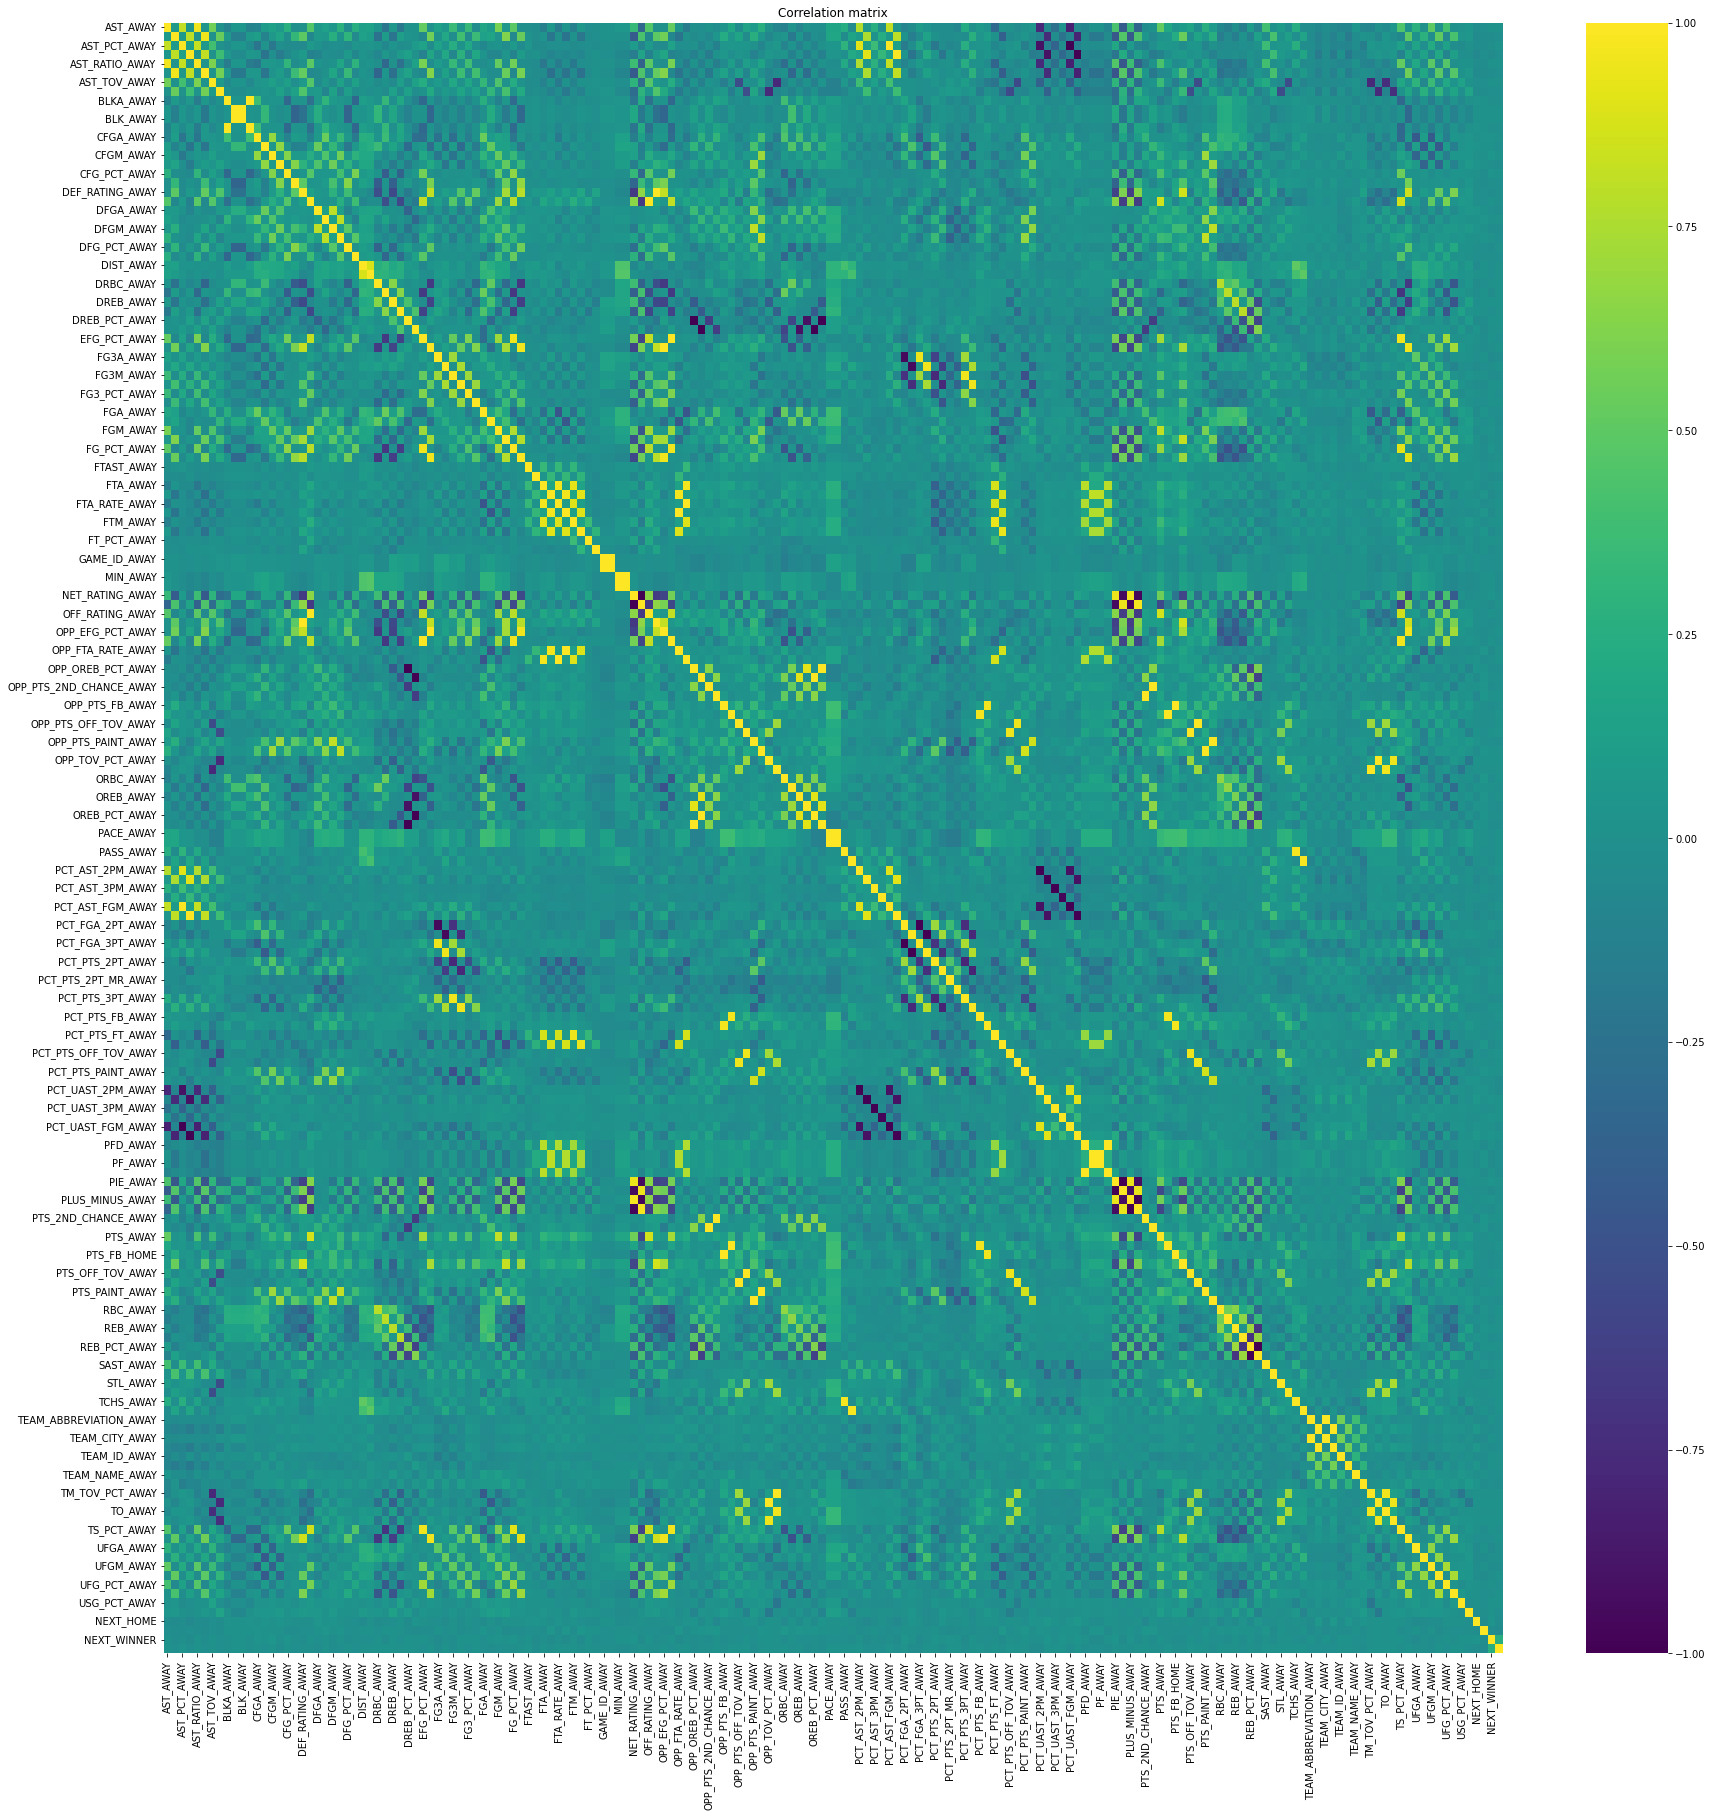

In [71]:
fig = plt.figure(figsize=(30, 30))
sb.heatmap(
    df.corr(),
    cmap='viridis'
)
plt.title('Correlation matrix');

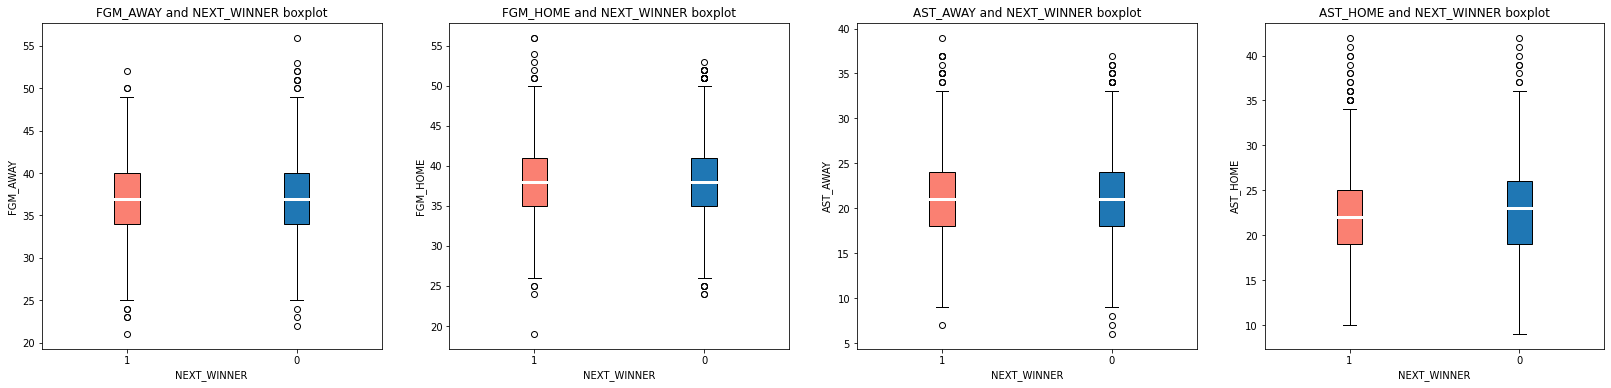

In [72]:
columns = ['FGM_AWAY', 'FGM_HOME', 'AST_AWAY', 'AST_HOME']
mask = df['NEXT_WINNER'] == 1

d = {v: (df.loc[mask, v].tolist(), df.loc[~mask, v].tolist()) for v in columns}

def draw_boxplots(d):
    fig, axs = plt.subplots(1, len(columns), figsize=(28, 6))
    colors = ['salmon', 'C0']

    for i, (k, v) in enumerate(d.items()):
        b = axs[i].boxplot(v, patch_artist=True, medianprops=dict(color='white', linewidth=3))
        for patch, color in zip(b['boxes'], colors):
            patch.set_facecolor(color)

        axs[i].set_xticklabels([1, 0])
        axs[i].set_title(columns[i] + ' and NEXT_WINNER boxplot')
        axs[i].set_ylabel(columns[i])
        axs[i].set_xlabel('NEXT_WINNER')

    plt.show()

draw_boxplots(d)

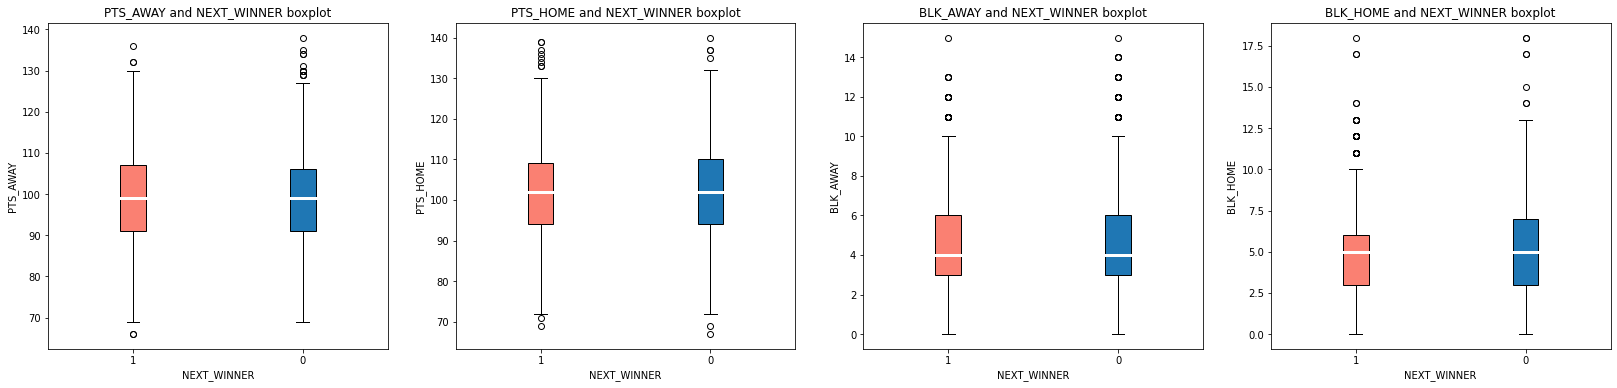

In [73]:
columns=['PTS_AWAY', 'PTS_HOME', 'BLK_AWAY', 'BLK_HOME']
d = {v: (df.loc[mask, v].tolist(), df.loc[~mask, v].tolist()) for v in columns}
draw_boxplots(d)

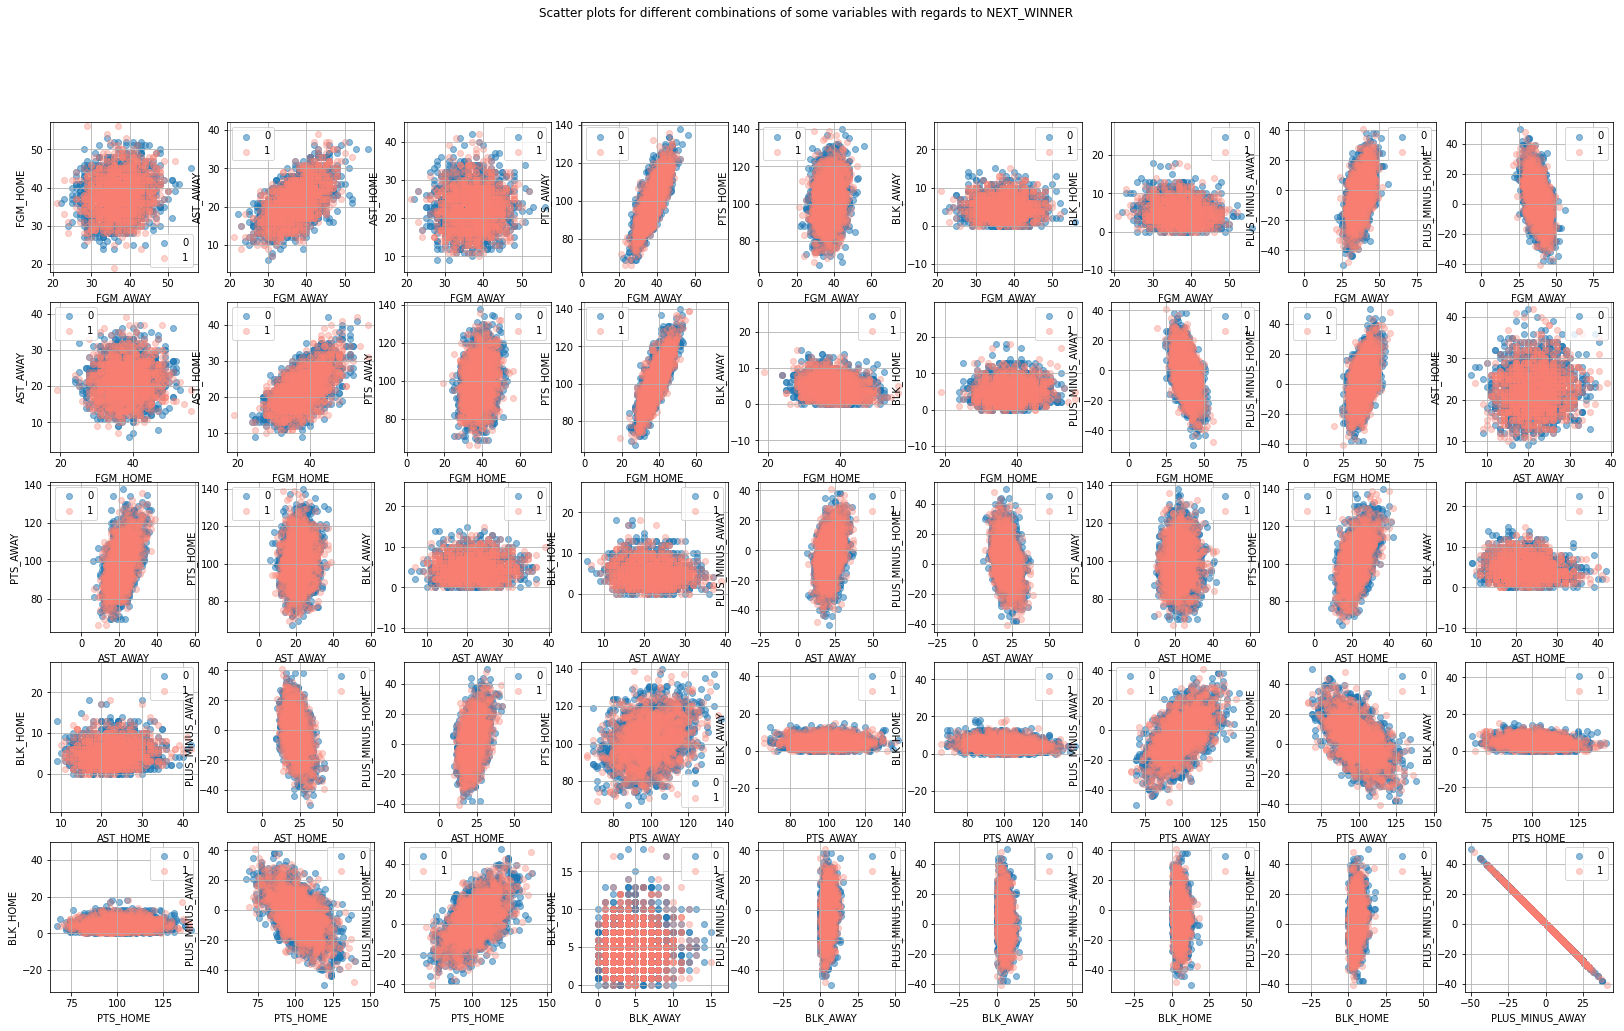

In [74]:
fig, axs = plt.subplots(5, 9, figsize=(28, 16))
axs = axs.reshape(-1)

columns = ['FGM_AWAY', 'FGM_HOME', 'AST_AWAY', 'AST_HOME', 'PTS_AWAY', 'PTS_HOME', 'BLK_AWAY', 'BLK_HOME', 'PLUS_MINUS_AWAY', 'PLUS_MINUS_HOME']

def draw_scatterplots(columns):
    k = 0
    for i, _ in enumerate(columns):
        for j in range(i+1, len(columns)):
            axs[k].scatter(
                df.loc[~mask, columns[i]].to_numpy(), 
                df.loc[~mask, columns[j]].to_numpy(), 
                label='0',
                alpha=0.5
            )

            axs[k].scatter(
                df.loc[mask, columns[i]].to_numpy(), 
                df.loc[mask, columns[j]].to_numpy(), 
                label='1',
                c='salmon',
                alpha=0.35
            )

            axs[k].set_xlabel(columns[i])
            axs[k].set_ylabel(columns[j])
            axs[k].legend()
            axs[k].grid()
            axs[k].axis('equal')
            k += 1

    fig.suptitle('Scatter plots for different combinations of some variables with regards to NEXT_WINNER')
    plt.show()

draw_scatterplots(columns)

# **6. Reference classifier** 
**Prepare the data for the first classification. No need for any feature engineering or hyperparameter optimization at this point. Just create any successful and meaningful classifier.**

I created a basic logistic regression model and used minmax scaling.

In [75]:
weights = X['NEXT_WEIGHT']
X = X.drop(columns=['NEXT_WEIGHT'])

X_test = X_test.drop(columns=['id'])

In [76]:
model = LogisticRegression(max_iter=20000)

scaler = MinMaxScaler()
scaler.fit(X)

model.fit(scaler.transform(X), y)
y_pred_train = model.predict(X)
accuracy_score(y_pred_train, y, sample_weight=weights)

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


0.5028148509531063

In [77]:
submission = df_test.loc[:, df_test.columns.isin(('id', ))]

y_pred_test = model.predict(scaler.transform(X_test))
print(f'number of predicted 0\'s: {(y_pred_test == 0).sum()}\nnumber of predicted 1\'s: {(y_pred_test == 1).sum()}')

submission.loc[:,'NEXT_WINNER'] = y_pred_test
submission

number of predicted 0's: 1043
number of predicted 1's: 187


/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,id,NEXT_WINNER
0,0,0.0
1,1,0.0
2,2,0.0
3,3,0.0
4,4,0.0
...,...,...
1225,1225,0.0
1226,1226,0.0
1227,1227,0.0
1228,1228,0.0


In [78]:
submission.to_csv('submission.csv', index=None)